In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from similarity_searching_sketches.caffe_vector_reader import CaffeVectorsIterator
from similarity_searching_sketches.distances import get_sample_distances
from similarity_searching_sketches.persistence import save_np_array
from similarity_searching_sketches.visualization import hist_array


#### Experiment configuration

In [2]:
DATA_FOLDER = '/home/matej/data/sketch-testing/dataset_10K/'
CAFFE_VECTORS_PATH = '/home/matej/data/sketch-testing/profi-neuralnet-100K.data'  #caffe vectors file 
TRAIN_SET_SAVE_PATH = DATA_FOLDER + 'train_set.npy'  #persist train dataset to
TEST_SET_SAVE_PATH = DATA_FOLDER + 'test_set.npy'  #persist test dataset to
DATA_SAMPLE_SIZE = 10000  #number of samples to read
PORTION_TEST_SET = 0.2  #portion of samples in test set
N_DIST_DISTR_REF_OBJ = 100  #how many reference objects to use for distance distribution estimation
LOG_BY = 1000


#### Read raw data



In [3]:
iterator = CaffeVectorsIterator(CAFFE_VECTORS_PATH, DATA_SAMPLE_SIZE, allow_duplicities=False)


In [4]:
_, decaf_vecs = zip(*list(iterator))
decaf_vecs = np.array(decaf_vecs)


#### Shape of vectors (n_samples, n_features)

In [5]:
decaf_vecs.shape


(10000, 4096)

#### Shuffle vectors

In [6]:
np.random.shuffle(decaf_vecs)


#### Train/test split

In [7]:
training_set, test_set = train_test_split(decaf_vecs, test_size=PORTION_TEST_SET)


In [8]:
training_set.shape


(8000, 4096)

In [9]:
test_set.shape


(2000, 4096)

#### Persist 

In [10]:
save_np_array(TRAIN_SET_SAVE_PATH, training_set)
save_np_array(TEST_SET_SAVE_PATH, test_set)


#### Analysis of distance distribution

In [11]:
distances_l1, distances_l2 = get_sample_distances(vec_matrix=training_set, sample_size=N_DIST_DISTR_REF_OBJ, p=[1, 2],
                                                  log_by=LOG_BY)


INFO:Going to compute distances from selected 100 reference objects to all 7900 other objects in given matrix for p=[1, 2].
INFO:IterationLogger| Started iteration no.: 1000
 Time from previous iteration: 5.574172496795654s
 Time from start: 5.574172496795654s
INFO:IterationLogger| Started iteration no.: 2000
 Time from previous iteration: 5.1679675579071045s
 Time from start: 10.742141008377075s
INFO:IterationLogger| Started iteration no.: 3000
 Time from previous iteration: 5.359594345092773s
 Time from start: 16.101736545562744s
INFO:IterationLogger| Started iteration no.: 4000
 Time from previous iteration: 5.083645582199097s
 Time from start: 21.185382604599s
INFO:IterationLogger| Started iteration no.: 5000
 Time from previous iteration: 4.896506309509277s
 Time from start: 26.081889629364014s
INFO:IterationLogger| Started iteration no.: 6000
 Time from previous iteration: 4.915095806121826s
 Time from start: 30.996986150741577s
INFO:IterationLogger| Started iteration no.: 7000
 

#### Distance distribution Minkowski L1

In [12]:
pd.DataFrame(distances_l1).describe()


,0
count,790000.000000
mean,2561.676756
std,332.307668
min,458.146423
25%,2346.702576
50%,2567.411377
75%,2785.231995
max,4267.825195


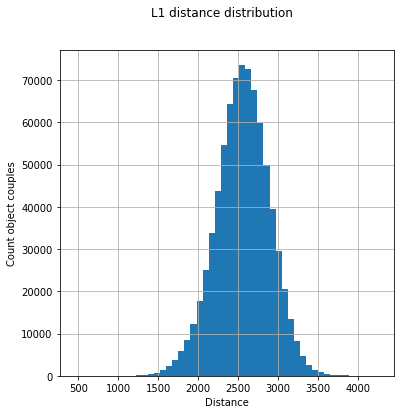

In [14]:
hist_array(distances_l1, bins=50, title='L1 distance distribution', xlabel='Distance', ylabel='Count object couples',
           figsize=(6, 6))


#### Distance distribution Minkowski L2

In [15]:
pd.DataFrame(distances_l2).describe()


,0
count,790000.000000
mean,82.497861
std,10.835121
min,18.339581
25%,75.126574
50%,81.654999
75%,88.941282
max,149.592636


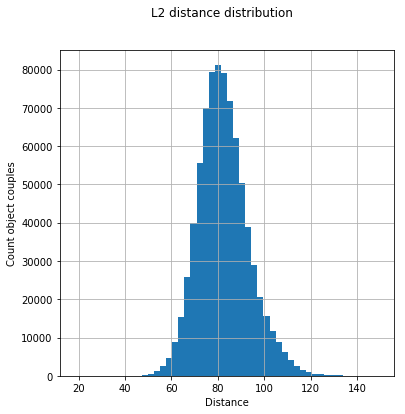

In [16]:
hist_array(distances_l2, bins=50, title='L2 distance distribution', xlabel='Distance', ylabel='Count object couples',
           figsize=(6, 6))
